In [1]:
using Revise

In [2]:
using Pkg
Pkg.activate(".")

  Activating project at `C:\Users\gvdeynde\Documents\Repositories\Deepburn.jl`


In [3]:
#Pkg.add("PyPlot")

In [4]:
using BenchmarkTools
using PyPlot

In [20]:
using Deepburn

In [23]:
CF = CarathéodoryFejér(16, prec=512)[1]

cra{BigFloat}("Carathéodory-Fejér", 16, 2.12485371101322684439589183814085263535316952341062813956876892721842672182672567804843074049352472510522782724601626432370495510997845602075366323230174117e-16, Complex{BigFloat}[-5.09015218661537166720216092703869635113340497705685673469853886418060253720073440348038425753622333631965684368810596794213859797339163768591483831551977211e-07 + 2.42200176528773759608898187246750259275268841018118670708876221716518587316346002421358027249890214097937936035271424762034046921264091287564755355607508379e-05im, 0.000211517421825205441448608873745237529428107496544547038900833421409140179772110424231291244661178310362263277590832852226359799180451783824801219983403857434 - 0.004389296964739718226890464797834520917771863185343405751773324402809139836358302im, 0.0410231368354073005080049101936464368120115003694132283822831445454578475081272294162384556897971179584174519860818404787130182582227862885837225131153375488 + 0.1574346617345905706924083816515609

In [24]:
pmin = -7
pmax = 7
x = -(10.) .^ range(pmin,pmax, 10001)
xticks = -10. .^ range(pmin,pmax, step=1);

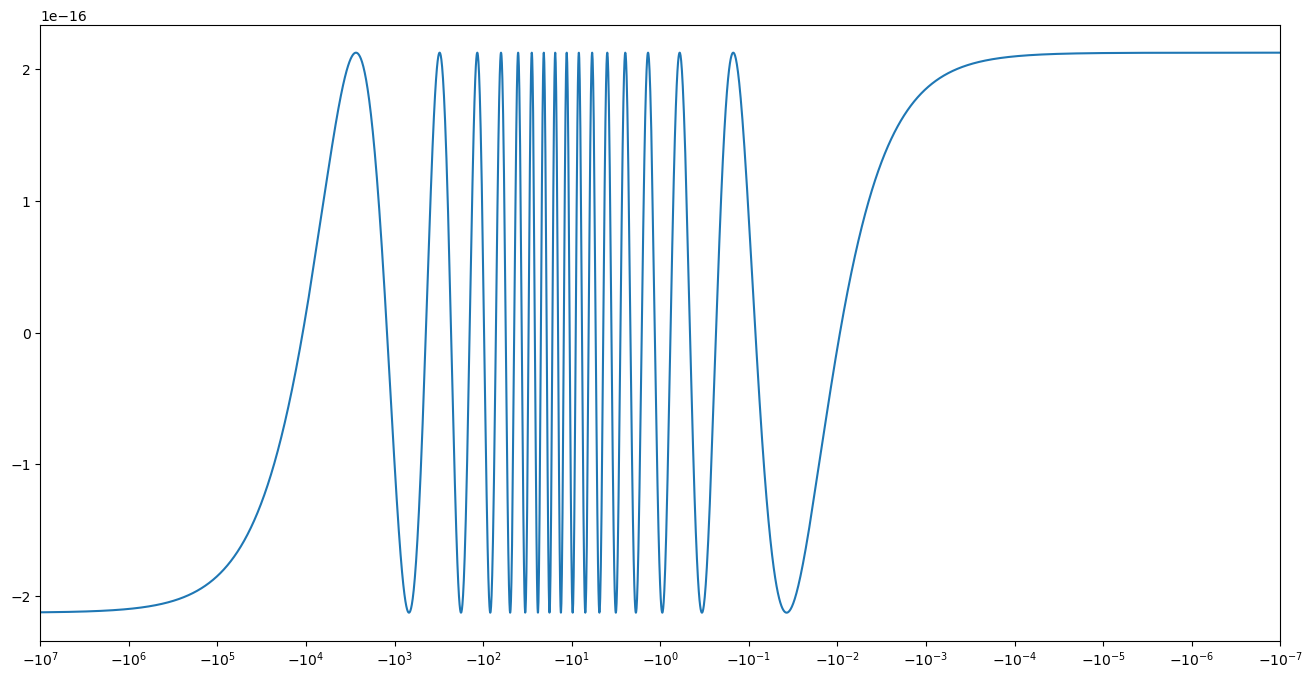

In [26]:
figure(figsize=[16,8])
plot(x,cra_abs_error(CF,x, prec=512))
xlim([last(xticks), xticks[1]])
xscale("symlog", linthresh=1e-300)